# Introdução

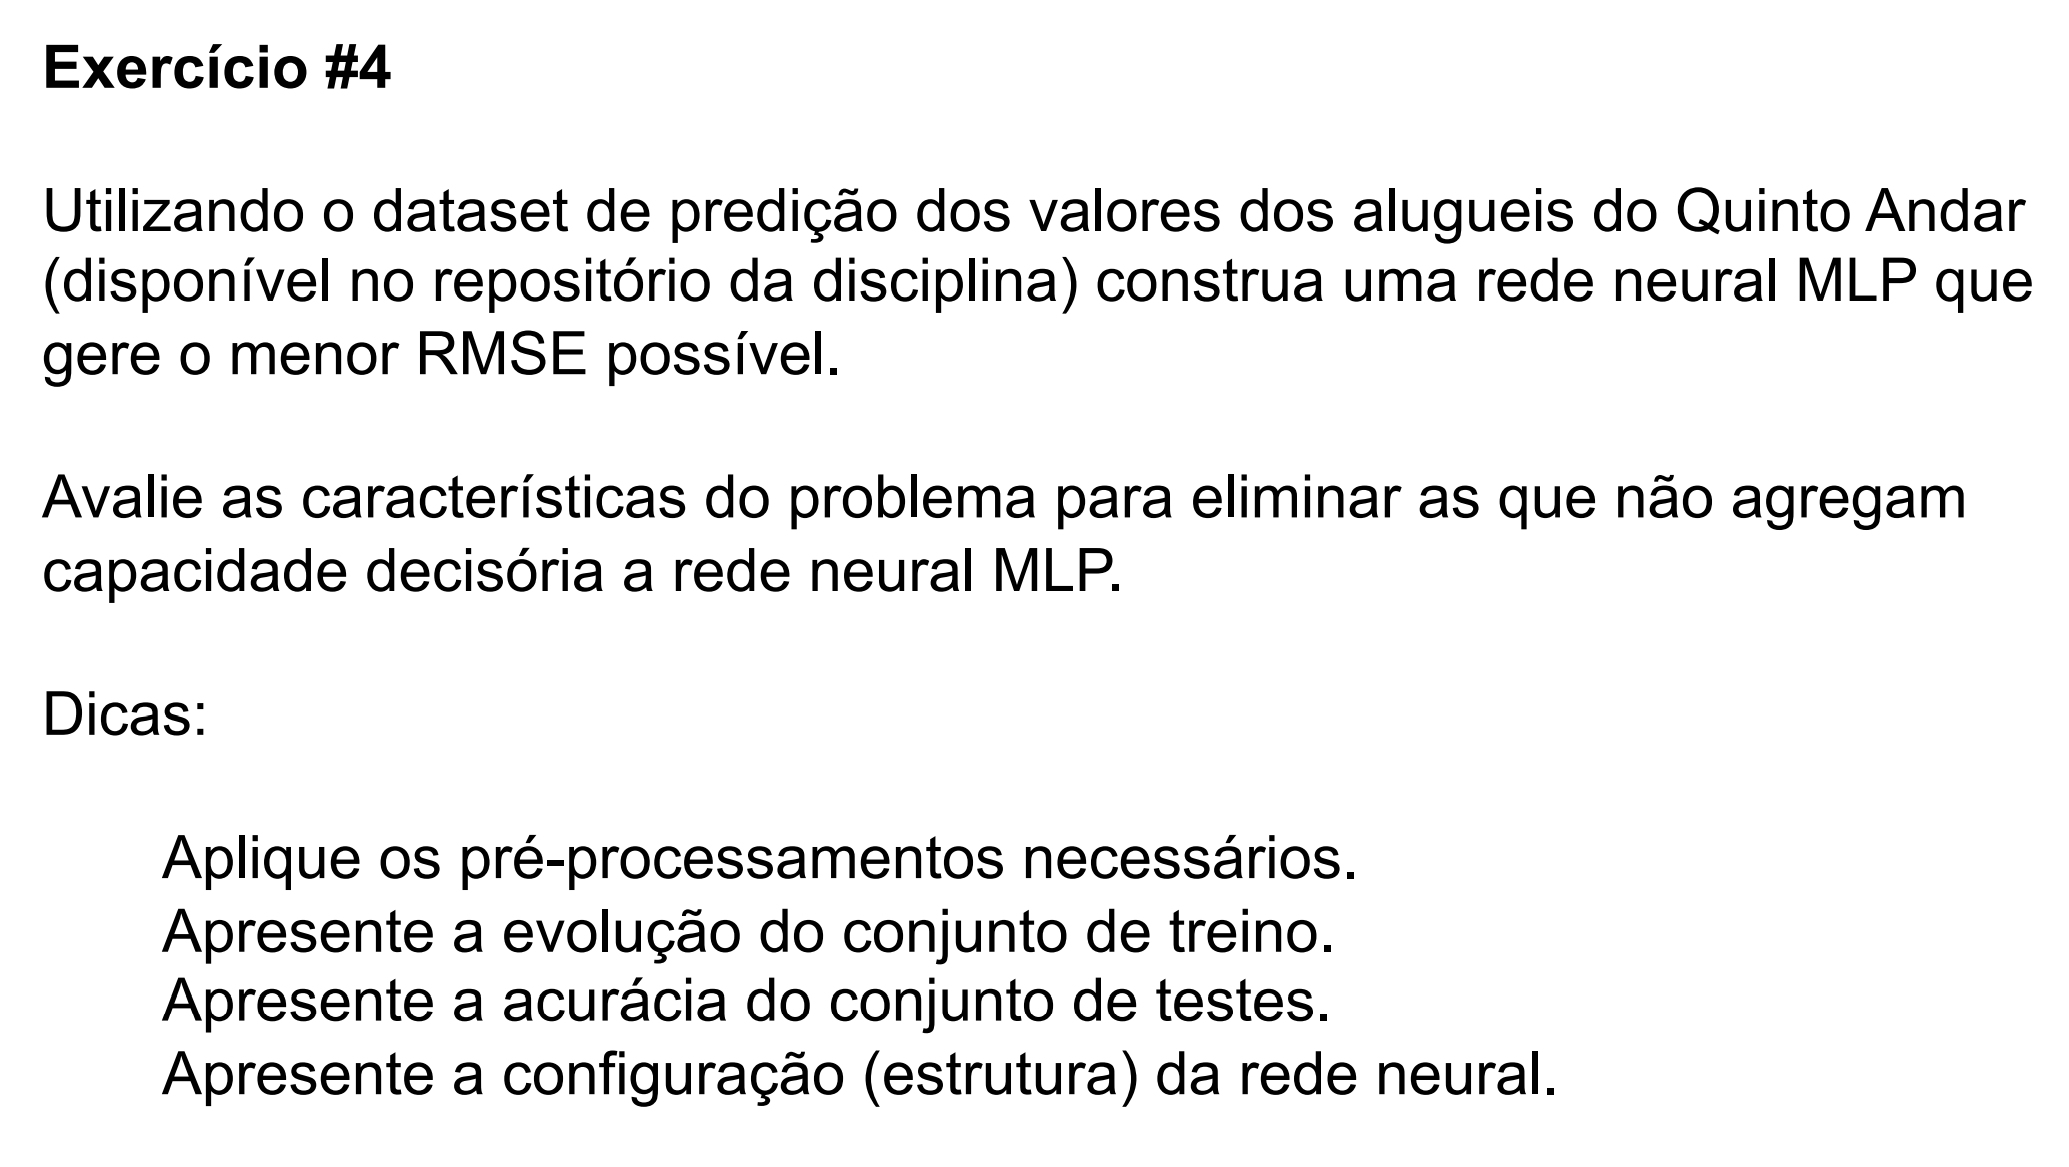

# Bicliotecas e Funções

In [197]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf

from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [198]:
import random

# Define a semente com o valor 42
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [199]:
pd.options.display.float_format = '{:.2f}'.format

# Código

In [200]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/quinto_andar/houses_to_rent_fiap.csv', sep = ';')
df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,211,42,3300
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,1750,63,4960
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,0,41,2800
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,22,17,1112
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,25,11,800
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,24,22,1478
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,973,191,15000
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,332,78,6000
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,279,155,12000


## Transformar Categóricas

In [196]:
# converter colunas categóricas em dummies
df = pd.get_dummies(df, columns=['furniture'], prefix='furniture')
df = pd.get_dummies(df, columns=['city'], prefix='city')
df = pd.get_dummies(df, columns=['animal'], prefix='animal')
df

,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept
0,70,2,1,1,7,2065,211,42,3300,1,0,0,0,0,0,1,1,0
1,320,4,4,0,20,1200,1750,63,4960,0,1,0,0,0,0,1,1,0
2,80,1,1,1,6,1000,0,41,2800,0,1,0,0,1,0,0,1,0
3,51,2,1,0,2,270,22,17,1112,0,1,0,0,1,0,0,1,0
4,25,1,1,0,1,0,25,11,800,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,24,22,1478,1,0,0,0,1,0,0,0,1
10688,285,4,4,4,17,3100,973,191,15000,0,1,0,0,0,0,1,1,0
10689,70,3,3,0,8,980,332,78,6000,1,0,0,0,0,1,0,0,1
10690,120,2,2,2,8,1585,279,155,12000,1,0,0,0,0,1,0,1,0


In [171]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept
count,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00,10692.00
mean,149.22,2.51,2.24,1.61,1174.02,366.70,53.30,3896.25,0.24,0.76,0.12,0.08,0.11,0.14,0.55,0.78,0.22
std,537.02,1.17,1.41,1.59,15592.31,3107.83,47.77,3408.55,0.43,0.43,0.32,0.27,0.31,0.35,0.50,0.42,0.42
min,11.00,1.00,1.00,0.00,0.00,0.00,3.00,450.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,56.00,2.00,1.00,0.00,170.00,38.00,21.00,1530.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,90.00,2.00,2.00,1.00,560.00,125.00,36.00,2661.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
75%,182.00,3.00,3.00,2.00,1237.50,375.00,68.00,5000.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
max,46335.00,13.00,10.00,12.00,1117000.00,313700.00,677.00,45000.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   area                     10692 non-null  int64 
 1   rooms                    10692 non-null  int64 
 2   bathroom                 10692 non-null  int64 
 3   parking spaces           10692 non-null  int64 
 4   floor                    10692 non-null  object
 5   hoa (R$)                 10692 non-null  int64 
 6   property tax (R$)        10692 non-null  int64 
 7   fire insurance (R$)      10692 non-null  int64 
 8   rent amount (R$)         10692 non-null  int64 
 9   furniture_furnished      10692 non-null  uint8 
 10  furniture_not furnished  10692 non-null  uint8 
 11  city_Belo Horizonte      10692 non-null  uint8 
 12  city_Campinas            10692 non-null  uint8 
 13  city_Porto Alegre        10692 non-null  uint8 
 14  city_Rio de Janeiro      10692 non-nul

In [173]:
df['floor'].unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [174]:
df[df['floor']=='-']

,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept
5,376,3,3,7,-,0,834,121,8000,0,1,0,0,0,0,1,1,0
15,330,4,6,6,-,680,328,121,8000,1,0,0,1,0,0,0,1,0
19,600,4,5,6,-,0,9500,181,12000,0,1,0,0,0,0,1,1,0
20,100,7,4,0,-,0,118,58,3800,0,1,0,0,0,0,1,1,0
23,35,1,1,0,-,0,3,14,1100,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,150,3,2,4,-,0,186,53,3500,1,0,0,1,0,0,0,1,0
10661,250,1,2,2,-,0,602,34,2200,0,1,0,1,0,0,0,1,0
10668,24,1,1,0,-,0,0,14,870,0,1,0,0,0,0,1,1,0
10674,135,4,2,1,-,0,115,51,3300,0,1,0,0,0,1,0,1,0


Assumindo que as residencia com floor igual '-' sejam casas, criarei uma coluna extra *tipo*, onde 0 é casa e 1 é prédio.

In [175]:
df["tipo"] = df["floor"].apply(lambda x: 0 if x == "-" else 1)
df.head()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,furniture_not furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,animal_not acept,tipo
0,70,2,1,1,7,2065,211,42,3300,1,0,0,0,0,0,1,1,0,1
1,320,4,4,0,20,1200,1750,63,4960,0,1,0,0,0,0,1,1,0,1
2,80,1,1,1,6,1000,0,41,2800,0,1,0,0,1,0,0,1,0,1
3,51,2,1,0,2,270,22,17,1112,0,1,0,0,1,0,0,1,0,1
4,25,1,1,0,1,0,25,11,800,0,1,0,0,0,0,1,0,1,1


In [176]:
df['floor'].replace('-',1,inplace=True)
df['floor'] = df['floor'].astype(int)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   property tax (R$)    10692 non-null  int64 
 10  fire insurance (R$)  10692 non-null  int64 
 11  rent amount (R$)     10692 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1002.5+ KB


As colunas furniture_not furnished e animal_not acept são redundantes em relação aos seus opostos, portanto vou remove-las.

In [178]:
df.drop(columns=['furniture_not furnished', 'animal_not acept'], inplace = True)
df.head()

,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,tipo
0,70,2,1,1,7,2065,211,42,3300,1,0,0,0,0,1,1,1
1,320,4,4,0,20,1200,1750,63,4960,0,0,0,0,0,1,1,1
2,80,1,1,1,6,1000,0,41,2800,0,0,0,1,0,0,1,1
3,51,2,1,0,2,270,22,17,1112,0,0,0,1,0,0,1,1
4,25,1,1,0,1,0,25,11,800,0,0,0,0,0,1,0,1


## Explore

## Correlação

[Text(0.5, 0, 'area'),
 Text(1.5, 0, 'rooms'),
 Text(2.5, 0, 'bathroom'),
 Text(3.5, 0, 'parking spaces'),
 Text(4.5, 0, 'floor'),
 Text(5.5, 0, 'hoa (R$)'),
 Text(6.5, 0, 'property tax (R$)'),
 Text(7.5, 0, 'fire insurance (R$)'),
 Text(8.5, 0, 'rent amount (R$)'),
 Text(9.5, 0, 'furniture_furnished'),
 Text(10.5, 0, 'city_Belo Horizonte'),
 Text(11.5, 0, 'city_Campinas'),
 Text(12.5, 0, 'city_Porto Alegre'),
 Text(13.5, 0, 'city_Rio de Janeiro'),
 Text(14.5, 0, 'city_São Paulo'),
 Text(15.5, 0, 'animal_acept'),
 Text(16.5, 0, 'tipo')]

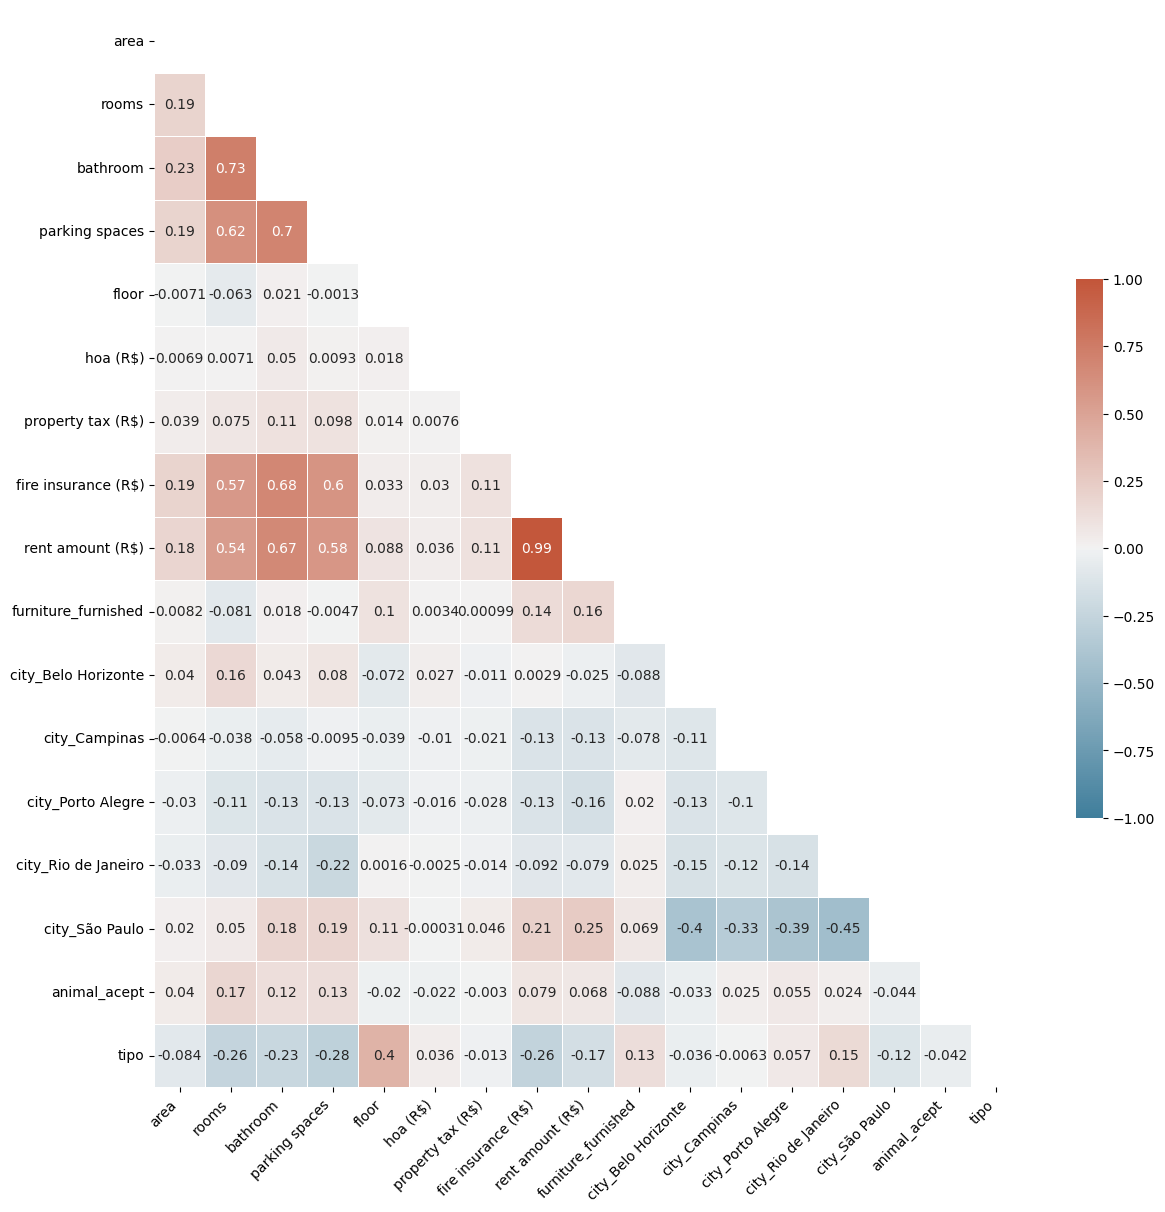

In [179]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (14, 14))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

A correlação que mais salta aos olhos é a relação entre rent amount e fire insurance. Talvez retirar o fire insurence.

## Plots

In [204]:
# continous_features = list(set(df.columns) - set(['rent amount (R$)']))
continous_features = list(set(df.columns))
continous_features

['parking spaces',
 'city',
 'fire insurance (R$)',
 'bathroom',
 'animal',
 'hoa (R$)',
 'area',
 'rent amount (R$)',
 'rooms',
 'furniture',
 'floor',
 'property tax (R$)']

TypeError: Horizontal orientation requires numeric `x` variable.

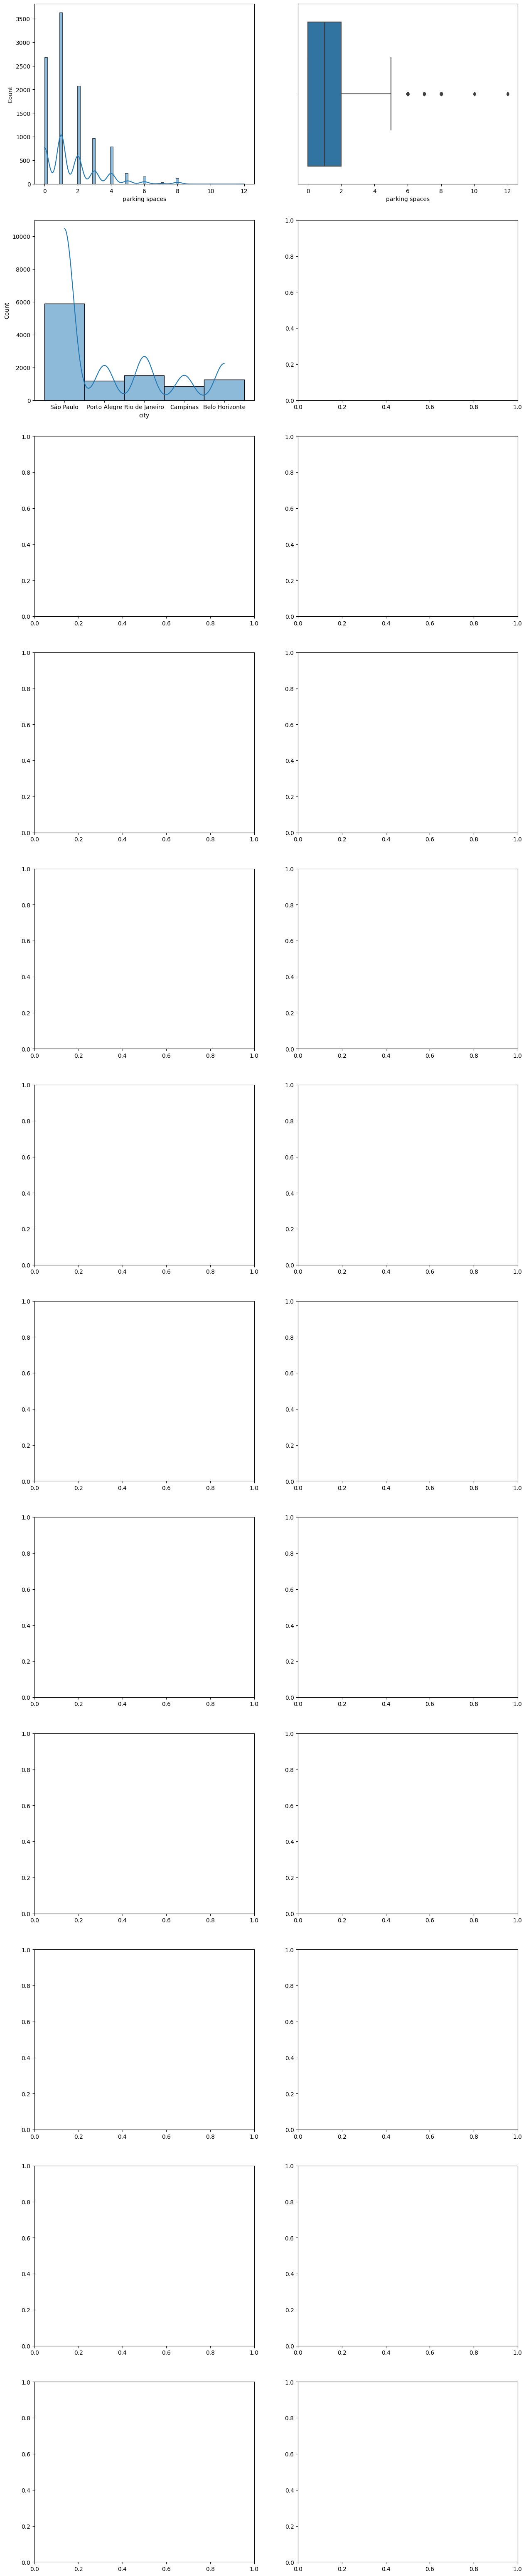

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [205]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 80))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    
    sns.histplot(x=data[feature], ax=axes[i][0], kde=True)
    sns.boxplot(x=data[feature], ax=axes[i][1])

Os gráficos boxplot demonstram que existem uma grande quantidade de outliers, que talvez diminua a saúde do dataset para o treinamento.

## p-value analisys

In [184]:
df

,area,rooms,bathroom,parking spaces,floor,hoa (R$),property tax (R$),fire insurance (R$),rent amount (R$),furniture_furnished,city_Belo Horizonte,city_Campinas,city_Porto Alegre,city_Rio de Janeiro,city_São Paulo,animal_acept,tipo
0,70,2,1,1,7,2065,211,42,3300,1,0,0,0,0,1,1,1
1,320,4,4,0,20,1200,1750,63,4960,0,0,0,0,0,1,1,1
2,80,1,1,1,6,1000,0,41,2800,0,0,0,1,0,0,1,1
3,51,2,1,0,2,270,22,17,1112,0,0,0,1,0,0,1,1
4,25,1,1,0,1,0,25,11,800,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,63,2,1,1,5,402,24,22,1478,1,0,0,1,0,0,0,1
10688,285,4,4,4,17,3100,973,191,15000,0,0,0,0,0,1,1,1
10689,70,3,3,0,8,980,332,78,6000,1,0,0,0,1,0,0,1
10690,120,2,2,2,8,1585,279,155,12000,1,0,0,0,1,0,1,1


In [183]:
# Padronização dos dados
scaler = StandardScaler()
dff = scaler.fit_transform(df.drop('rent amount (R$)', axis=1))

# Cálculo do p-value de cada feature em relação a target
f_values, p_values = f_regression(dff, df['rent amount (R$)'].values)

# Armazenamento dos resultados em um dataframe
dfp = pd.DataFrame({'feature': df.columns[:-1], 'p_value': p_values})

# Ordenação dos resultados
dfp = dfp.sort_values(by='p_value', ascending=False)

# Formatação do p-value com 4 casas decimais
dfp['p_value'] = dfp['p_value'].apply(lambda x: '{:.4f}'.format(x))

# Visualização dos resultados
print(dfp)

                feature p_value
9   furniture_furnished  0.0101
5              hoa (R$)  0.0002
14       city_São Paulo  0.0000
12    city_Porto Alegre  0.0000
4                 floor  0.0000
6     property tax (R$)  0.0000
10  city_Belo Horizonte  0.0000
11        city_Campinas  0.0000
8      rent amount (R$)  0.0000
15         animal_acept  0.0000
0                  area  0.0000
13  city_Rio de Janeiro  0.0000
1                 rooms  0.0000
2              bathroom  0.0000
3        parking spaces  0.0000
7   fire insurance (R$)  0.0000


## Split Train Test

In [92]:
# separa do dados em features e target
X = df.drop("rent amount (R$)", axis=1)
y = df["rent amount (R$)"]


In [93]:
# separa os dados de treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Em seguida, padronizaremos os dados, mudando a escala através do StandardScaler

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
epochs = 1000

## Modelo 1

In [96]:
# Criação da rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [97]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1088      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Compilação da rede
model.compile(loss='mean_squared_error', optimizer='adam')

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

# add callbacks
earlystopper = EarlyStopping(patience=10)

callbacks = [earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/1000
268/268 [==============================] - 1s 1ms/step - loss: 26216366.0000 - val_loss: 22228554.0000
Epoch 2/1000
268/268 [==============================] - 0s 1ms/step - loss: 15913478.0000 - val_loss: 8107415.5000
Epoch 3/1000
268/268 [==============================] - 0s 1ms/step - loss: 6549034.5000 - val_loss: 4435848.5000
Epoch 4/1000
268/268 [==============================] - 0s 987us/step - loss: 4629360.0000 - val_loss: 3146172.7500
Epoch 5/1000
268/268 [==============================] - 0s 1ms/step - loss: 3530405.2500 - val_loss: 2316049.2500
Epoch 6/1000
268/268 [==============================] - 0s 1ms/step - loss: 2765741.0000 - val_loss: 1747414.6250
Epoch 7/1000
268/268 [==============================] - 0s 998us/step - loss: 2178531.5000 - val_loss: 1289104.8750
Epoch 8/1000
268/268 [==============================] - 0s 1ms/step - loss: 1714726.0000 - val_loss: 942245.6875
Epoch 9/1000
268/268 [==============================] - 0s 1ms/step - loss: 135071

In [65]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

67/67 [==============================] - 0s 558us/step
              precision    recall  f1-score   support

       500.0       0.00      0.00      0.00         4
       550.0       0.00      0.00      0.00         3
       555.0       0.00      0.00      0.00         1
       580.0       0.00      0.00      0.00         1
       583.0       0.00      0.00      0.00         1
       590.0       0.00      0.00      0.00         1
       595.0       0.00      0.00      0.00         1
       600.0       0.00      0.00      0.00         2
       609.0       0.00      0.00      0.00         1
       620.0       0.00      0.00      0.00         1
       623.0       0.00      0.00      0.00         0
       628.0       0.00      0.00      0.00         1
       637.0       0.00      0.00      0.00         0
       650.0       0.00      0.00      0.00        10
       660.0       0.00      0.00      0.00         1
       665.0       0.00      0.00      0.00         1
       674.0       0.00   

c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control t

## Conclusão parcial

O modelo obteve uma acurária de **73,76% de acurácia** sobre os dados de validação.

Mas como são muitas combinações possíveis na construção da arquitetura do modelo, a seguir vou utilizar o método de GridSearch para acha um modelo ótimo.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

# define the model
def create_model(num_layers=1, num_units=32, activation='relu', lr=0.01):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2, 3],
          'num_units': [16, 32, 64],
          'activation': ['relu', 'tanh', 'sigmoid'],
          'lr': [0.0001, 0.001, 0.01]}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Melhor Score: {grid_result.best_score_}\nParametros: {grid_result.best_params_}')

C:\Users\KValim\AppData\Local\Temp\ipykernel_16792\1972115852.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1000, batch_size=16, verbose=0)


# Conclusão (mudar)

Curiosamente o resultado do grid search foi inferior (**83,30%**) ao modelo construido a mão (**86,89%**), talvez tenha cometido algum erro na construção do grid.